# Deep Learning in Particle Physics 

## 1. Defining the Problem

This project is a signal-to-background binary classification of SUSY particles which stands for supersymmetry - a theory proposing a space-time symmetry where each particle in the standard model has a corresponding partner particle. The dataset was found on UCI Machine Learning Repository which is an open
data repository. Inspired by the ‘The Deep Learning on a Public Dataset Template’ and following the methodology of 'Deep Learning with Python' by F. Chollet , I decided to tackle the binary classification problem on the SUSY dataset. 

## 2. Measure of Success

As stated in the preliminary report, The AUC benchmark results presented in dataset's the original paper, 'Searching for Exotic Particles in High-Energy Physics with Deep Learning' by Baldi et al., served as the evaluation metric. AUC refers to the area under the receiver operating characteristic curve, which plots the true positive rate against the false positive rate. Higher AUC values indicate improved classification accuracy.  In their study, the authors employed three primary methods: Bayesian Decision Tree, a 5-layer neural network, and deep networks with a dropout algorithm. They achieved an impressive final AUC of 0.88. I will use both AUC and accuracy as the evaluation metrics since they both provide important insights into the model's performance.

## 3. Evaluation Protocol
Using simple hold-out evaluation in this project should work well since we have a large dataset available to evaluate the model. To do this, I will use the following code: model.evaluate(x_val,y_val) to explicitly evaluate the model on the held-out validation data set as stated in 'Deep Learning with Python'. Hold-out evaluation is used to test the performance of the model against unseen data and make small adjustments to hyperparameters and model architecture along the way until we create the optimized model. This evaluation method divides the training dataset into two splits of training and validation datasets. After each training session of the model, we evaluate the model on the validation set. I used an 80/20 split to create the training and validation sets and create a line plot to monitor the change in accuracy and AUC in each epoch of the training session.

## 4. Preparing Data

### 4.1 Importing the Dataset

In [1]:
# Required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from keras import models, layers, regularizers
from sklearn.model_selection import train_test_split

I noticed that there are no column headers so I created the headers according to the information found the website that dataset was found on.  

In [2]:
# Read the dataset and set the column headers 
susy = pd.read_csv('./Data/susy.csv', names = ['label','lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)'])

### 4.2 Exploring the Dataset

Here I explore the dataset's shape, columns, statistical values,  headers and data types. 

In [3]:
# Statistics Summary 
susy.describe()

,label,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,4.575654e-01,1.000318e+00,2.192580e-05,-4.994657e-05,9.994304e-01,-3.713140e-05,-1.972243e-05,9.999744e-01,3.542352e-05,1.001437e+00,-4.878472e-05,1.000360e+00,9.999559e-01,9.999164e-01,1.000422e+00,1.000112e+00,1.000192e+00,9.994852e-01,2.249139e-01
std,4.981961e-01,6.873341e-01,1.003107e+00,1.001670e+00,6.542200e-01,1.002839e+00,1.001631e+00,8.728877e-01,1.001654e+00,8.901668e-01,1.001594e+00,6.288446e-01,5.841139e-01,4.708406e-01,8.592491e-01,6.207165e-01,6.237672e-01,4.360948e-01,1.969804e-01
min,0.000000e+00,2.548815e-01,-2.102927e+00,-1.734789e+00,4.285860e-01,-2.059306e+00,-1.734202e+00,2.598711e-04,-1.727117e+00,7.693475e-08,-1.671863e+01,2.673070e-01,1.041228e-03,2.048078e-03,0.000000e+00,2.734135e-02,4.452858e-03,3.211849e-07,4.172130e-08
25%,0.000000e+00,5.624837e-01,-7.573512e-01,-8.673567e-01,5.969881e-01,-7.695916e-01,-8.683741e-01,4.784546e-01,-8.661510e-01,3.691849e-01,-4.923983e-01,5.883287e-01,6.223411e-01,6.505438e-01,1.705215e-01,5.985209e-01,5.134394e-01,6.879128e-01,6.908188e-02
50%,0.000000e+00,7.915511e-01,1.342127e-04,-3.880155e-04,7.997993e-01,-3.793710e-04,2.006134e-04,7.738360e-01,-9.172642e-03,8.019273e-01,-8.037898e-02,8.286114e-01,8.781311e-01,9.344703e-01,9.018388e-01,8.355336e-01,9.142514e-01,1.094396e+00,1.672500e-01
75%,1.000000e+00,1.204413e+00,7.576486e-01,8.670981e-01,1.162353e+00,7.692296e-01,8.674778e-01,1.207444e+00,8.687620e-01,1.375392e+00,3.489009e-01,1.211083e+00,1.220313e+00,1.283522e+00,1.613231e+00,1.207994e+00,1.384583e+00,1.369183e+00,3.303652e-01
max,1.000000e+00,2.055345e+01,2.101605e+00,1.734839e+00,3.303562e+01,2.059721e+00,1.734686e+00,2.106888e+01,1.740689e+00,2.338644e+01,2.048790e+01,2.107572e+01,1.616682e+01,6.731210e+00,2.068624e+01,2.115226e+01,1.561370e+01,1.591660e+00,1.000000e+00


In [4]:
# Check the column header names 
susy.head()

,label,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [5]:
# Shape of the data
print(susy.shape)

(5000000, 19)


In [6]:
# Dataset info / Datatypes
susy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   label                     float64
 1   lepton 1 pT               float64
 2   lepton 1 eta              float64
 3   lepton 1 phi              float64
 4   lepton 2 pT               float64
 5   lepton 2 eta              float64
 6   lepton 2 phi              float64
 7   missing energy magnitude  float64
 8   missing energy phi        float64
 9   MET_rel                   float64
 10  axial MET                 float64
 11  M_R                       float64
 12  M_TR_2                    float64
 13  R                         float64
 14  MT2                       float64
 15  S_R                       float64
 16  M_Delta_R                 float64
 17  dPhi_r_b                  float64
 18  cos(theta_r1)             float64
dtypes: float64(19)
memory usage: 724.8 MB


'Searching for Exotic Particles in High-Energy Physics with Deep Learning' paper argues that deep learning methods would diminish the need to create and use high level features for the binary classification problems. Since I am comparing my model performance to the results found in this paper, I also will create the neural network model only using the low level features found on the dataset and describe by the paper and found on the dataset's website. 

In [7]:
# Select low-level features
selected_features = ['label','lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude', 'missing energy phi']
data = susy[selected_features]

### 4.3 Cleaning the Dataset

Here I check for null and duplicate values in the dataset. 

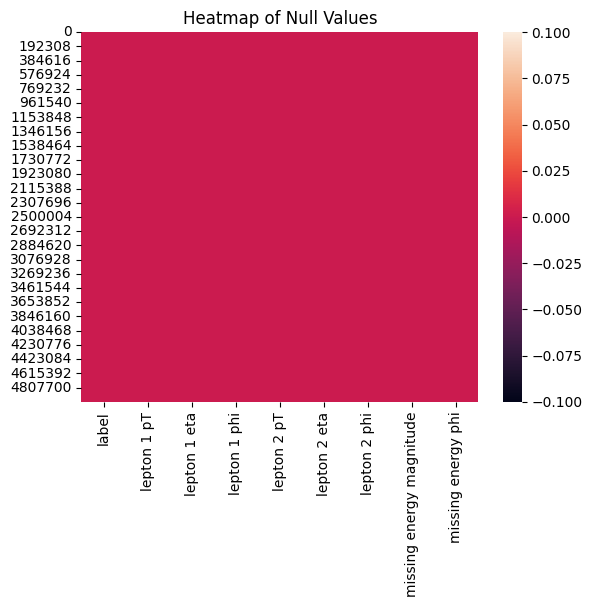

In [8]:
# Create of heatmap of null values
ax = sns.heatmap(data.isnull())
plt.title('Heatmap of Null Values')
plt.show()

As you can see above, there are no null values in the dataset and the dataset itself seems to be already clean. However, just to make sure I will also check for duplicate values. 

In [9]:
# Data shape before dropping duplicate values
data.shape

(5000000, 9)

In [10]:
# Drop Duplicate values
data = data.drop_duplicates()

In [11]:
# Data shape after dropping duplicate values
data.shape

(5000000, 9)

As you can see above there are no duplicate values in the dataset and the dataset itself was high quality and required no further cleaning other than adding column header names. 

### 4.4 Visualizing the Dataset

In this section, I would like to explore the dataset's features using visualizations and find out which ones are suitable to create a binary classification model.

Text(0.5, 1.02, 'Dataset Features Pairplot')

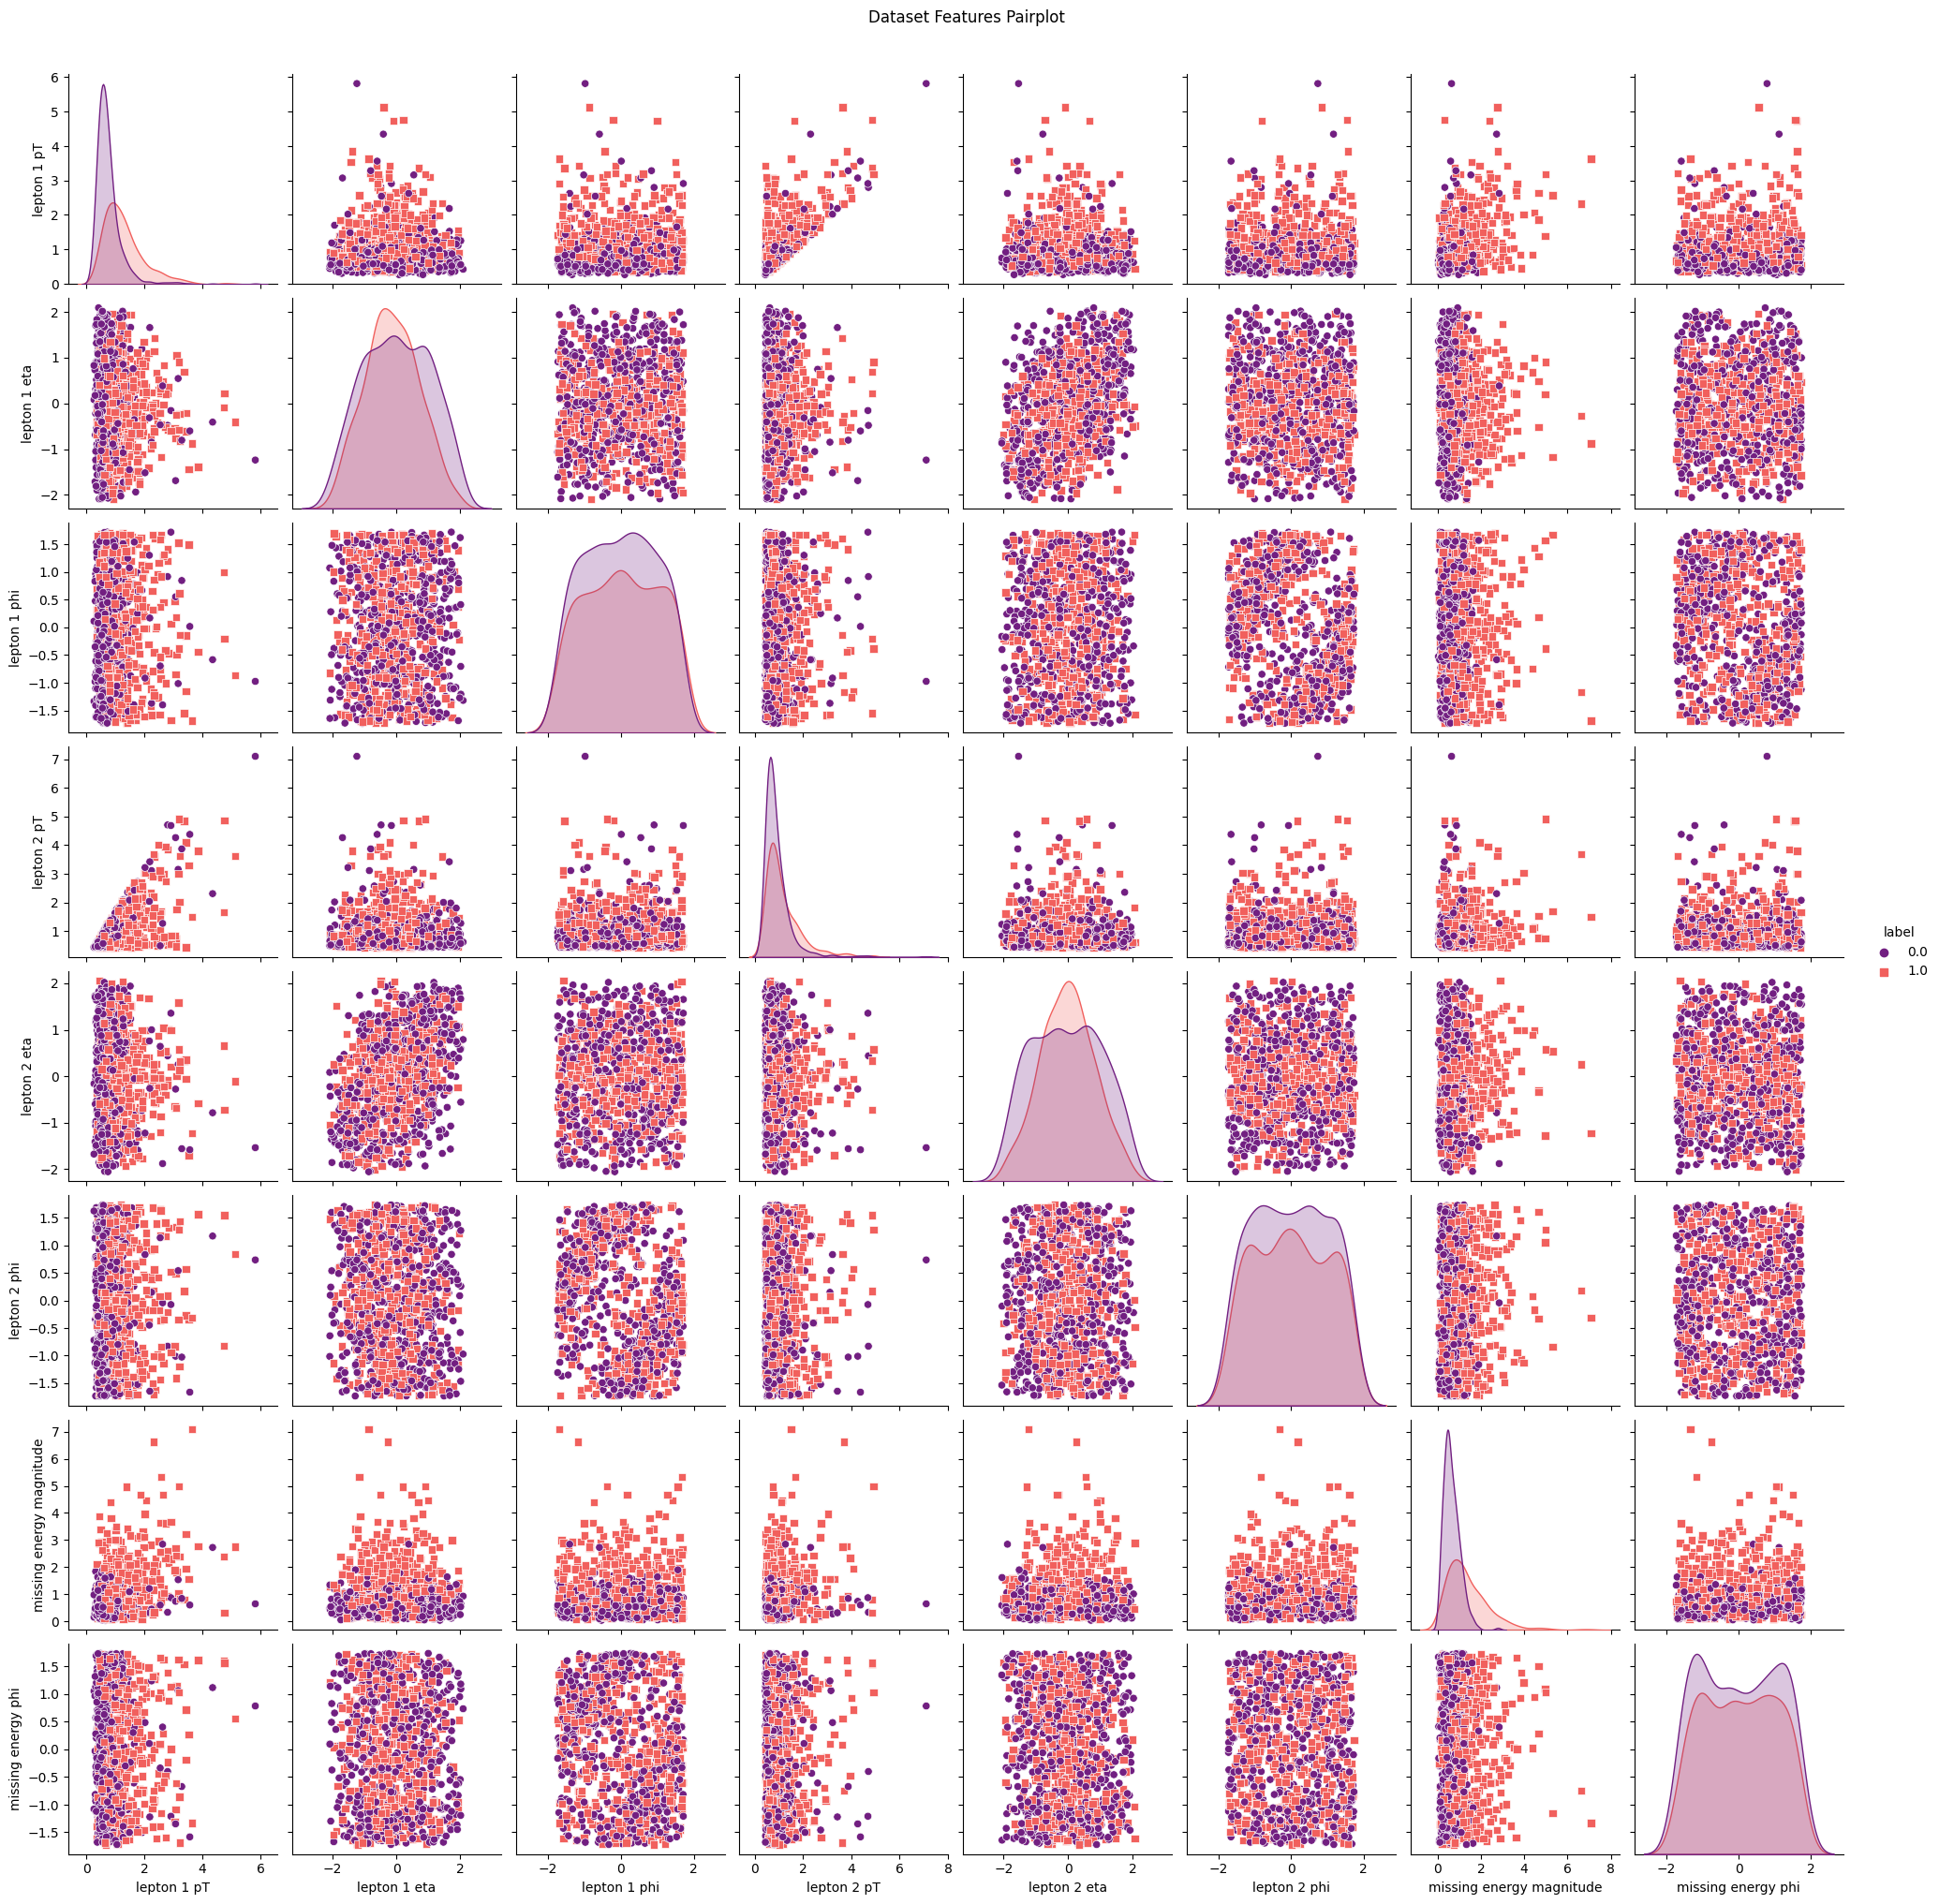

In [12]:
# Create a pairplot of random 1000 sample of the dataset - since the dataset is extremely large 

pairplot = sns.pairplot(data.sample(1000), hue = "label",markers=["o", "s"], palette = 'magma')
pairplot.fig.suptitle('Dataset Features Pairplot', y=1.02)

The plot above, suggest 'lepton 1 pT', 'lepton 1 phi' and 'missing energy magnitude' are a good choice for creating a classifier based on since the signal and background in almost all of these feature's plot are almost separated and are not mixed together like 'lepton 2 eta' or 'lepton 1 eta'.

### 4.5 Splitting the dataset

Here I split the dataset into training, validation, and testing datasets. 

In [13]:
X = data.iloc[:, 1:].values # Susy low level features
y = data['label'].values # Target feature value

# Create testing and training data - 80/20 split on the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
# Create validation set - 80/20 split on training dataset

X_val = X_train[:800000]
partial_X_train = X_train[800000:]
y_val = y_train[:800000]
partial_y_train = y_train[800000:]

## 5. Model Development

Here we start model development, first with only 2 hidden layers using relu activation and adding a output layer with sigmoid function. Later we try to over-fit this model and optimize the hyperparameter. 

In [15]:
# Baseline Model 
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(8,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


Now we train model with 10 epochs and a batch size of 512: 

In [16]:
# Train the model and evaluate the results
history = model.fit(partial_X_train, partial_y_train, epochs = 10, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_val, y_val)

Epoch 1/10
6250/6250 [==============================] - 6s 918us/step - loss: 0.4679 - accuracy: 0.7805 - auc: 0.8510 - val_loss: 0.4552 - val_accuracy: 0.7871 - val_auc: 0.8588
Epoch 2/10
6250/6250 [==============================] - 5s 867us/step - loss: 0.4525 - accuracy: 0.7887 - auc: 0.8601 - val_loss: 0.4509 - val_accuracy: 0.7890 - val_auc: 0.8611
Epoch 3/10
6250/6250 [==============================] - 5s 876us/step - loss: 0.4498 - accuracy: 0.7902 - auc: 0.8618 - val_loss: 0.4489 - val_accuracy: 0.7903 - val_auc: 0.8624
Epoch 4/10
6250/6250 [==============================] - 6s 907us/step - loss: 0.4479 - accuracy: 0.7913 - auc: 0.8630 - val_loss: 0.4470 - val_accuracy: 0.7915 - val_auc: 0.8636
Epoch 5/10
6250/6250 [==============================] - 5s 852us/step - loss: 0.4459 - accuracy: 0.7925 - auc: 0.8643 - val_loss: 0.4455 - val_accuracy: 0.7924 - val_auc: 0.8645
Epoch 6/10
6250/6250 [==============================] - 6s 882us/step - loss: 0.4445 - accuracy: 0.7934 - auc:

We can see above that the simple neural network model produced an accuracy or ACC of 0.7924 and and AUC of 0.8650 . 

In [17]:
# Check for history dictionary values
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])

In [18]:
# Defining plot AUC and loss and accuracy functions against the training and validation dataset
# Inspired by ML lectures/lab - I created my own function to stop repeating the plot function
import matplotlib.pyplot as plt

def plot_auc(auc_values, val_auc_values, epochs):
    plt.plot(epochs, auc_values, 'ro', label='Training AUC')
    plt.plot(epochs, val_auc_values, 'r', label='Validation AUC')
    plt.title('Training and Validation AUC')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.legend()
    plt.show()
    
def plot_loss(loss_values, val_loss_values, epochs):
    plt.plot(epochs, loss_values, 'ro', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def plot_acc(acc, val_acc, epochs):
    plt.plot(epochs, acc, 'go', label='Training acc')
    plt.plot(epochs, val_acc, 'g', label='Validation acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

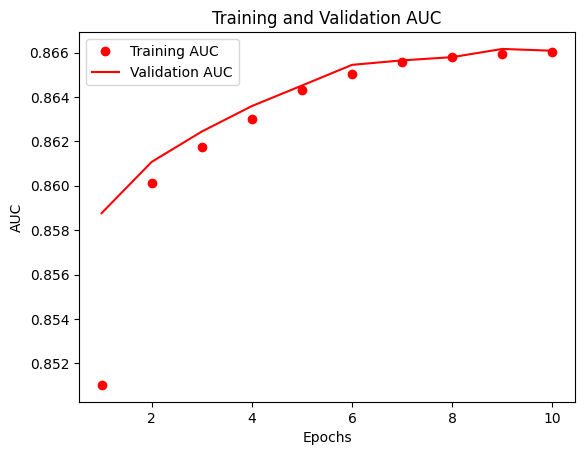

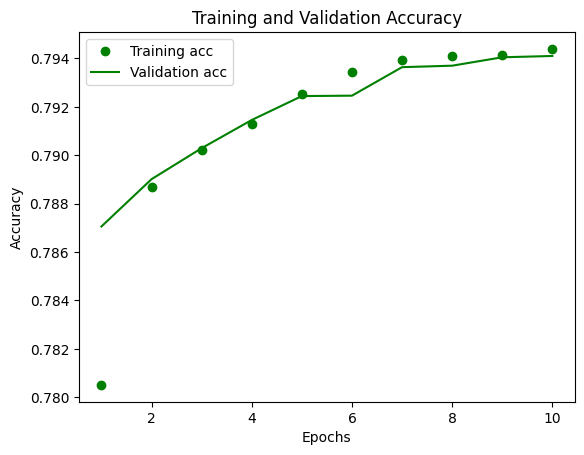

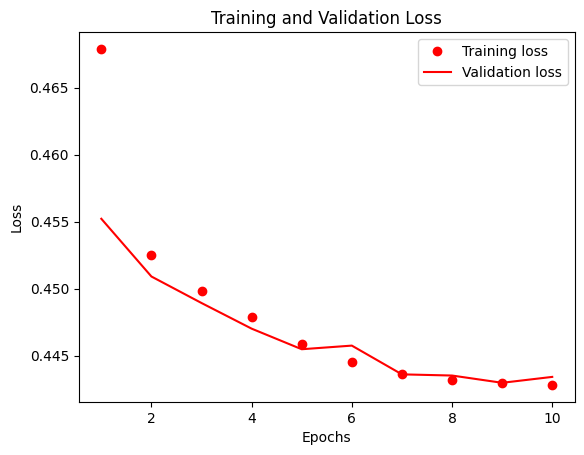

In [19]:
# Plot ACC / ACC / Loss in training and validation sets 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
auc = history_dict['auc'] # For each model, the compiled the name iterates: auc, auc_1, auc_2, etc. 
val_auc = history_dict['val_auc']
epochs = range(1, len(loss_values) + 1)

plot_auc(auc,val_auc,epochs)
plot_acc(acc, val_acc,epochs)
plot_loss(loss_values, val_loss_values,epochs)

## 6. Scaling up: Overfit Model Development

In this section, we overfit the model by tweaking different parameters.

### 6.1 Adding Layers

In [20]:
# Add one additional relu layer - 3 hidden layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(8,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

history = model.fit(partial_X_train, partial_y_train, epochs = 10, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_val, y_val)


Epoch 1/10
6250/6250 [==============================] - 6s 935us/step - loss: 0.4662 - accuracy: 0.7807 - auc_1: 0.8515 - val_loss: 0.4552 - val_accuracy: 0.7871 - val_auc_1: 0.8597
Epoch 2/10
6250/6250 [==============================] - 6s 898us/step - loss: 0.4512 - accuracy: 0.7893 - auc_1: 0.8606 - val_loss: 0.4489 - val_accuracy: 0.7908 - val_auc_1: 0.8621
Epoch 3/10
6250/6250 [==============================] - 6s 900us/step - loss: 0.4473 - accuracy: 0.7916 - auc_1: 0.8631 - val_loss: 0.4458 - val_accuracy: 0.7924 - val_auc_1: 0.8640
Epoch 4/10
6250/6250 [==============================] - 6s 903us/step - loss: 0.4448 - accuracy: 0.7930 - auc_1: 0.8646 - val_loss: 0.4522 - val_accuracy: 0.7883 - val_auc_1: 0.8645
Epoch 5/10
6250/6250 [==============================] - 6s 896us/step - loss: 0.4434 - accuracy: 0.7938 - auc_1: 0.8655 - val_loss: 0.4425 - val_accuracy: 0.7939 - val_auc_1: 0.8660
Epoch 6/10
6250/6250 [==============================] - 6s 895us/step - loss: 0.4424 - acc

Adding layers made a significant statistical difference of 0.0001  in accuracy and 0.0019 in AUC. 

In [21]:
# Add two additional relu layer- 4 hidden layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(8,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

history = model.fit(partial_X_train, partial_y_train, epochs = 10, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_val, y_val)

Epoch 1/10
6250/6250 [==============================] - 7s 972us/step - loss: 0.4600 - accuracy: 0.7841 - auc_2: 0.8548 - val_loss: 0.4473 - val_accuracy: 0.7917 - val_auc_2: 0.8633
Epoch 2/10
6250/6250 [==============================] - 6s 971us/step - loss: 0.4454 - accuracy: 0.7929 - auc_2: 0.8643 - val_loss: 0.4476 - val_accuracy: 0.7911 - val_auc_2: 0.8662
Epoch 3/10
6250/6250 [==============================] - 6s 949us/step - loss: 0.4422 - accuracy: 0.7948 - auc_2: 0.8664 - val_loss: 0.4426 - val_accuracy: 0.7940 - val_auc_2: 0.8672
Epoch 4/10
6250/6250 [==============================] - 6s 941us/step - loss: 0.4408 - accuracy: 0.7955 - auc_2: 0.8672 - val_loss: 0.4399 - val_accuracy: 0.7960 - val_auc_2: 0.8677
Epoch 5/10
6250/6250 [==============================] - 6s 962us/step - loss: 0.4396 - accuracy: 0.7962 - auc_2: 0.8679 - val_loss: 0.4388 - val_accuracy: 0.7964 - val_auc_2: 0.8686
Epoch 6/10
6250/6250 [==============================] - 6s 990us/step - loss: 0.4387 - acc

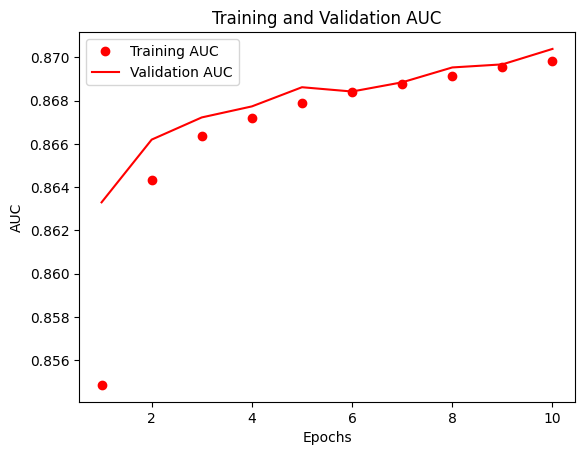

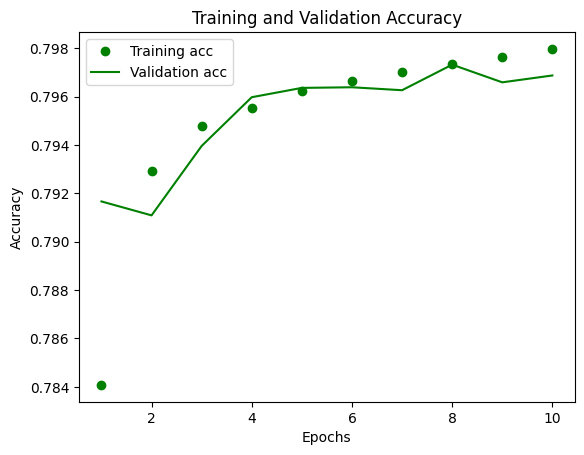

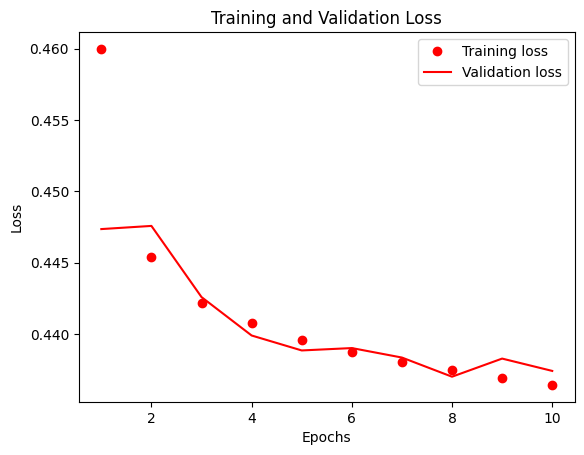

In [23]:
# Plot ACC / ACC / Loss in training and validation sets 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
auc = history_dict['auc_2'] 
val_auc = history_dict['val_auc_2']
epochs = range(1, len(loss_values) + 1)

plot_auc(auc,val_auc,epochs)
plot_acc(acc, val_acc,epochs)
plot_loss(loss_values, val_loss_values,epochs)

Adding two additional layers to sum up having four hidden layers increased the accuracy by 0.0018 and the AUC by 0.0024 which is an important statistical difference. Let's explore the performance of a model with 5 hidden layers: 

### 6.2 Increasing Layer Capacity

In [56]:
# Increase the layer capacity to 32 
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(8,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

history = model.fit(partial_X_train, partial_y_train, epochs = 10, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_val,y_val)

Epoch 1/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.4543 - accuracy: 0.7881 - auc_24: 0.8588 - val_loss: 0.4421 - val_accuracy: 0.7945 - val_auc_24: 0.8666
Epoch 2/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.4393 - accuracy: 0.7963 - auc_24: 0.8681 - val_loss: 0.4357 - val_accuracy: 0.7982 - val_auc_24: 0.8704
Epoch 3/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.4354 - accuracy: 0.7986 - auc_24: 0.8705 - val_loss: 0.4339 - val_accuracy: 0.7994 - val_auc_24: 0.8716
Epoch 4/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.4336 - accuracy: 0.7998 - auc_24: 0.8716 - val_loss: 0.4344 - val_accuracy: 0.7991 - val_auc_24: 0.8720
Epoch 5/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.4326 - accuracy: 0.8002 - auc_24: 0.8722 - val_loss: 0.4340 - val_accuracy: 0.7997 - val_auc_24: 0.8726
Epoch 6/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.4321 - accur

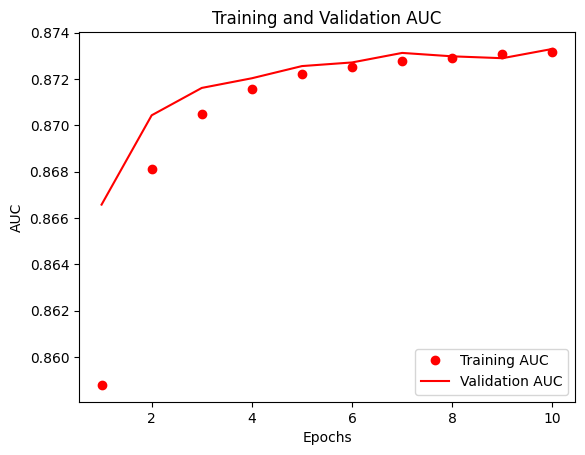

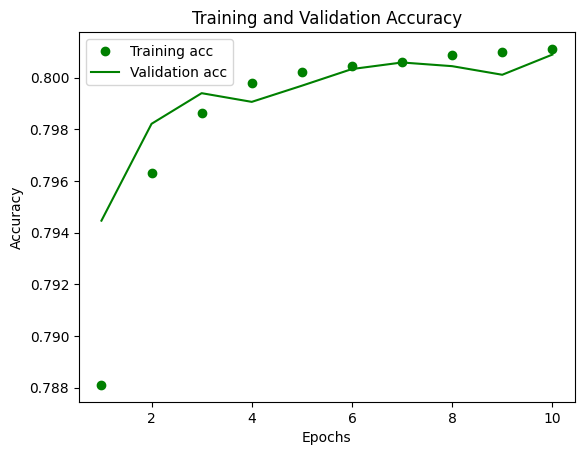

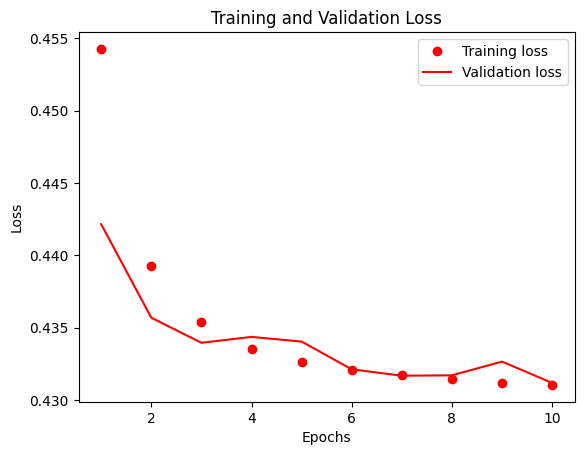

In [57]:
# Plot ACC / ACC / Loss in training and validation sets 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
auc = history_dict['auc_24']
val_auc = history_dict['val_auc_24']
epochs = range(1, len(loss_values) + 1)

plot_auc(auc,val_auc,epochs)
plot_acc(acc, val_acc,epochs)
plot_loss(loss_values, val_loss_values,epochs)

Increasing layer capacity from 16 to 32 while keeping the number of hidden layers at 4 , made a statistically large difference in such a way that the there was 0.0040 increase in accuracy and 0.0029 increase in AUC. Let's try increasing it from 32 to 64 and experimenting with these values: 

In [58]:
# Increase the layer capacity to 64
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(8,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

history = model.fit(partial_X_train, partial_y_train, epochs = 10, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_val,y_val)

Epoch 1/10
6250/6250 [==============================] - 15s 2ms/step - loss: 0.4503 - accuracy: 0.7902 - auc_25: 0.8613 - val_loss: 0.4384 - val_accuracy: 0.7961 - val_auc_25: 0.8693
Epoch 2/10
6250/6250 [==============================] - 13s 2ms/step - loss: 0.4364 - accuracy: 0.7981 - auc_25: 0.8699 - val_loss: 0.4333 - val_accuracy: 0.7997 - val_auc_25: 0.8720
Epoch 3/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.4335 - accuracy: 0.7998 - auc_25: 0.8717 - val_loss: 0.4369 - val_accuracy: 0.7979 - val_auc_25: 0.8727
Epoch 4/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.4322 - accuracy: 0.8005 - auc_25: 0.8724 - val_loss: 0.4327 - val_accuracy: 0.7995 - val_auc_25: 0.8729
Epoch 5/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.4316 - accuracy: 0.8008 - auc_25: 0.8728 - val_loss: 0.4324 - val_accuracy: 0.8006 - val_auc_25: 0.8728
Epoch 6/10
6250/6250 [==============================] - 13s 2ms/step - loss: 0.4312 -

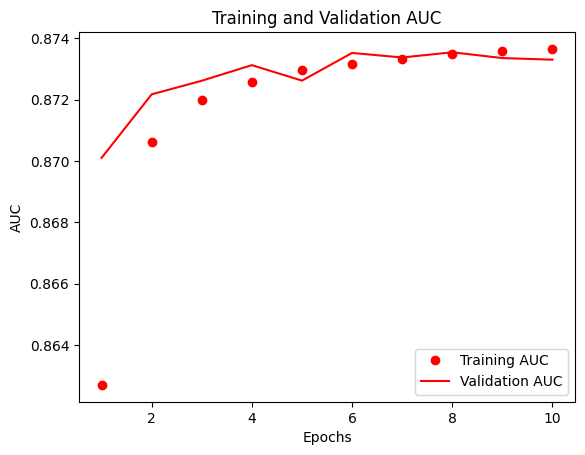

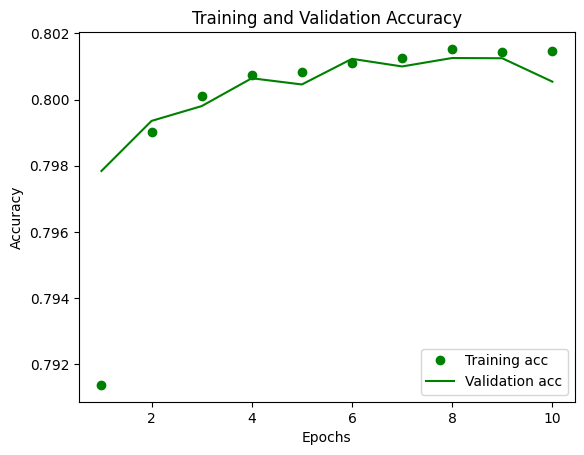

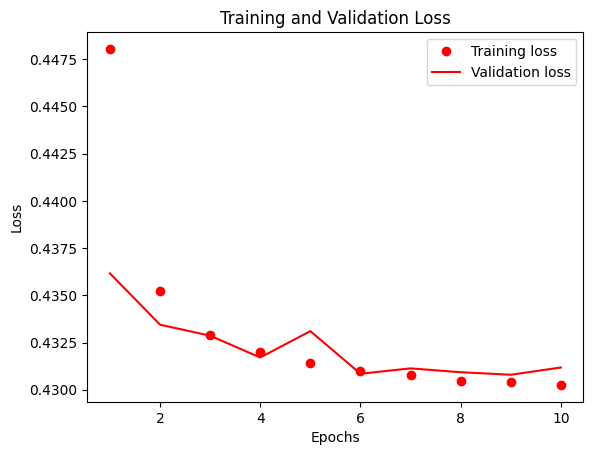

In [31]:
# Plot ACC / ACC / Loss in training and validation sets 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
auc = history_dict['auc_25'] # as different models the compiled the name changes : auc_1, auc_2, etc. 
val_auc = history_dict['val_auc_25']
epochs = range(1, len(loss_values) + 1)

plot_auc(auc,val_auc,epochs)
plot_acc(acc, val_acc,epochs)
plot_loss(loss_values, val_loss_values,epochs)

As you can see above, increasing the layer capacity from 32 to 64 statistically was an improvement to the model. The accuracy decreased by a very small amount of 0.0005 and the AUC increased by 0.0003. I would like to explore increasing the layer capacity from 64 to 128: 

In [59]:
# Increase the layer capacity to 128
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(8,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

history = model.fit(partial_X_train, partial_y_train, epochs = 10, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_val,y_val)

Epoch 1/10
6250/6250 [==============================] - 21s 3ms/step - loss: 0.4455 - accuracy: 0.7930 - auc_26: 0.8642 - val_loss: 0.4351 - val_accuracy: 0.7999 - val_auc_26: 0.8719
Epoch 2/10
6250/6250 [==============================] - 21s 3ms/step - loss: 0.4337 - accuracy: 0.7997 - auc_26: 0.8715 - val_loss: 0.4314 - val_accuracy: 0.8005 - val_auc_26: 0.8730
Epoch 3/10
6250/6250 [==============================] - 22s 4ms/step - loss: 0.4321 - accuracy: 0.8006 - auc_26: 0.8725 - val_loss: 0.4323 - val_accuracy: 0.8000 - val_auc_26: 0.8727
Epoch 4/10
6250/6250 [==============================] - 23s 4ms/step - loss: 0.4314 - accuracy: 0.8010 - auc_26: 0.8729 - val_loss: 0.4332 - val_accuracy: 0.7998 - val_auc_26: 0.8727
Epoch 5/10
6250/6250 [==============================] - 24s 4ms/step - loss: 0.4308 - accuracy: 0.8012 - auc_26: 0.8733 - val_loss: 0.4305 - val_accuracy: 0.8012 - val_auc_26: 0.8736
Epoch 6/10
6250/6250 [==============================] - 24s 4ms/step - loss: 0.4305 -

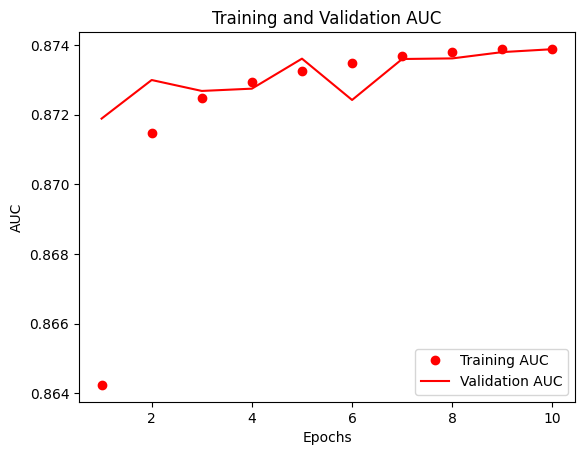

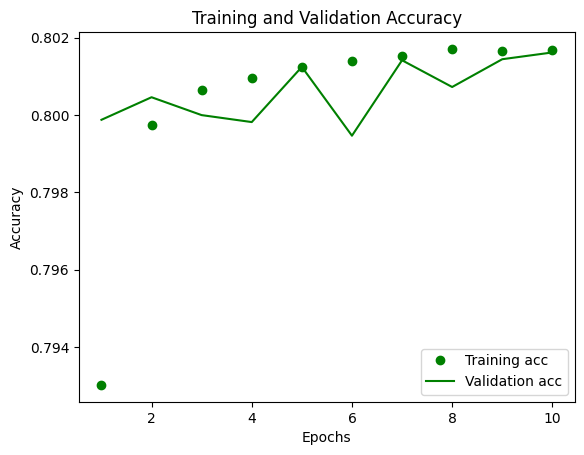

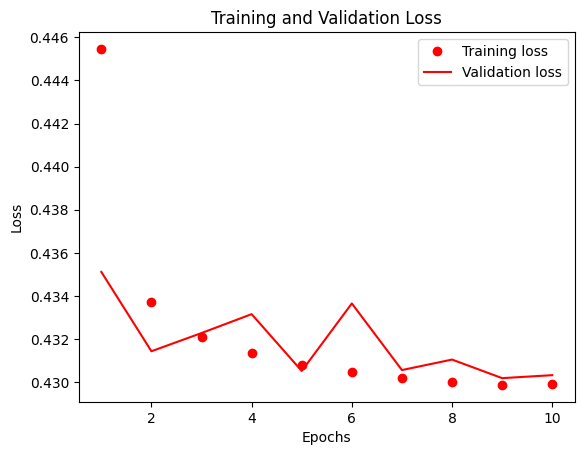

In [60]:
# Plot ACC / ACC / Loss in training and validation sets 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
auc = history_dict['auc_26'] # as different models the compiled the name changes : auc_1, auc_2, etc. 
val_auc = history_dict['val_auc_26']
epochs = range(1, len(loss_values) + 1)

plot_auc(auc,val_auc,epochs)
plot_acc(acc, val_acc,epochs)
plot_loss(loss_values, val_loss_values,epochs)

As you can see above, both the AUC increased by 0.0006 and ACC increased by 0.0010. This was significant difference. I would like to try increasing the layer capacity to 512 and further however that is computationally very expensive for further development of the model with each training of the model with 512 capacity taking approximately 24 minutes. So I decided not to further explore this for now. 

### 6.3 Train for More Epochs

In [61]:
# increase the number of epochs from 10 to 20
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(8,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

history = model.fit(partial_X_train, partial_y_train, epochs = 20, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_val,y_val)

Epoch 1/20
6250/6250 [==============================] - 23s 4ms/step - loss: 0.4453 - accuracy: 0.7931 - auc_27: 0.8643 - val_loss: 0.4339 - val_accuracy: 0.7992 - val_auc_27: 0.8720
Epoch 2/20
6250/6250 [==============================] - 20s 3ms/step - loss: 0.4335 - accuracy: 0.7998 - auc_27: 0.8716 - val_loss: 0.4318 - val_accuracy: 0.8005 - val_auc_27: 0.8726
Epoch 3/20
6250/6250 [==============================] - 20s 3ms/step - loss: 0.4320 - accuracy: 0.8006 - auc_27: 0.8725 - val_loss: 0.4320 - val_accuracy: 0.8001 - val_auc_27: 0.8726
Epoch 4/20
6250/6250 [==============================] - 21s 3ms/step - loss: 0.4312 - accuracy: 0.8011 - auc_27: 0.8730 - val_loss: 0.4319 - val_accuracy: 0.8004 - val_auc_27: 0.8731
Epoch 5/20
6250/6250 [==============================] - 20s 3ms/step - loss: 0.4307 - accuracy: 0.8013 - auc_27: 0.8734 - val_loss: 0.4303 - val_accuracy: 0.8013 - val_auc_27: 0.8736
Epoch 6/20
6250/6250 [==============================] - 21s 3ms/step - loss: 0.4304 -

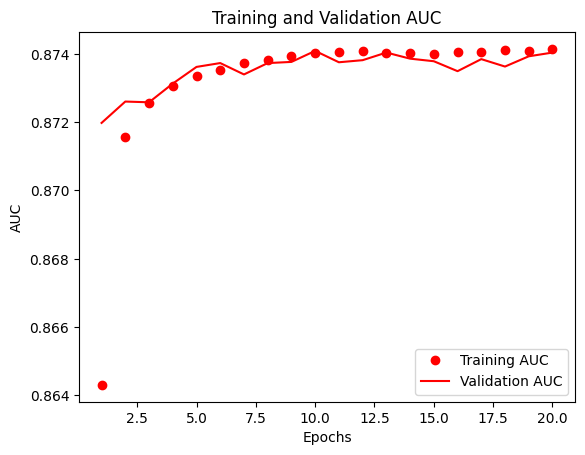

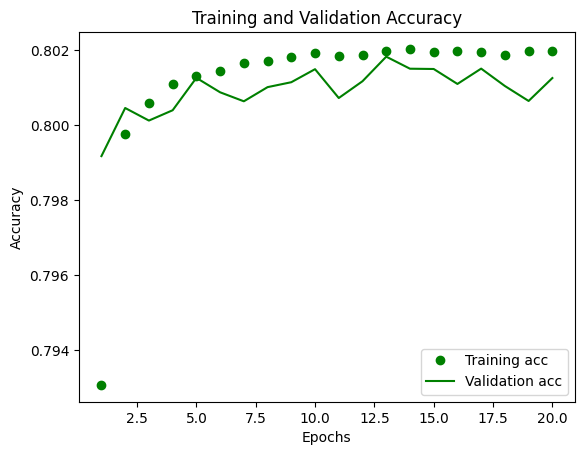

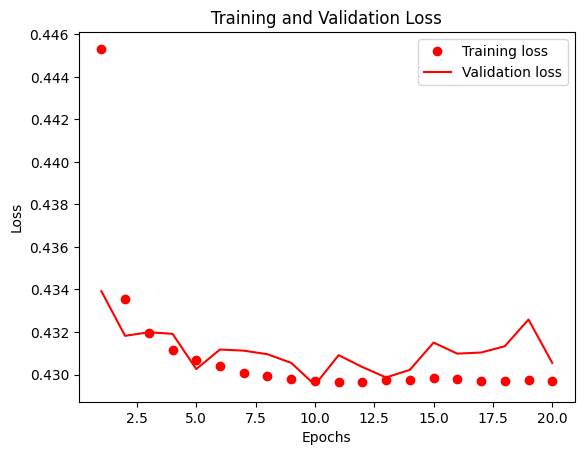

In [62]:
# Plot ACC / ACC / Loss in training and validation sets 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
auc = history_dict['auc_27'] 
val_auc = history_dict['val_auc_27']
epochs = range(1, len(loss_values) + 1)

plot_auc(auc,val_auc,epochs)
plot_acc(acc, val_acc,epochs)
plot_loss(loss_values, val_loss_values,epochs)

Training for more epochs made a very small difference, increased the ACC by 0.0001 and decreased the ACC by 0.0003. It increase the computational time from approximately 2 minutes to 9 minutes. However, it is not as much as 24 minutes before, so I will keep the epoch value at 20 unless later on the computational cost becomes too expensive and is not worth the improvement it makes. As you can see in the plots above, the AUC seems overfit and now we try to regularize the model.


## 7. Regularizing the Model & Tuning Hyperparameters

In this section, after overfitting the model, I adjust the hyperparameters and the model's architecutre to find the optimized version of the model. I will stop plotting loss and accuracy for each hyperparameter to save space and only plot the final model. Here are the steps I followed:

### 7.1 Add L1 and/or L2 Regularization

#### 7.1.1 Adding only L1 

In [63]:
# Add L2 = 0.001 regularization parameter 
l1= regularizers.l1(l1=0.001)
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l1, input_shape=(8,)))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l1))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l1))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l1))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

history = model.fit(partial_X_train, partial_y_train, epochs = 20, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_val,y_val)

Epoch 1/20
6250/6250 [==============================] - 19s 3ms/step - loss: 0.5650 - accuracy: 0.7811 - auc_28: 0.8506 - val_loss: 0.5039 - val_accuracy: 0.7855 - val_auc_28: 0.8573
Epoch 2/20
6250/6250 [==============================] - 18s 3ms/step - loss: 0.5015 - accuracy: 0.7860 - auc_28: 0.8568 - val_loss: 0.4983 - val_accuracy: 0.7867 - val_auc_28: 0.8582
Epoch 3/20
6250/6250 [==============================] - 18s 3ms/step - loss: 0.4985 - accuracy: 0.7861 - auc_28: 0.8571 - val_loss: 0.4993 - val_accuracy: 0.7850 - val_auc_28: 0.8580
Epoch 4/20
6250/6250 [==============================] - 18s 3ms/step - loss: 0.4969 - accuracy: 0.7861 - auc_28: 0.8571 - val_loss: 0.4953 - val_accuracy: 0.7864 - val_auc_28: 0.8581
Epoch 5/20
6250/6250 [==============================] - 18s 3ms/step - loss: 0.4957 - accuracy: 0.7861 - auc_28: 0.8572 - val_loss: 0.4955 - val_accuracy: 0.7856 - val_auc_28: 0.8580
Epoch 6/20
6250/6250 [==============================] - 19s 3ms/step - loss: 0.4952 -

As you can see above, adding L1, decreased both ACC and AUC by significant values. So I will stop increasing the L1 value. Instead I'll just explore using only L2 and later L1 and L2 together to compare the performances.

#### 7.1.2 Adding only L2

In [64]:
# Add L2 = 0.001 regularization parameter 
l2= regularizers.l2(l2=0.001)
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l2, input_shape=(8,)))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l2))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l2))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

history = model.fit(partial_X_train, partial_y_train, epochs = 20, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_val,y_val)

Epoch 1/20
6250/6250 [==============================] - 18s 3ms/step - loss: 0.4812 - accuracy: 0.7876 - auc_29: 0.8584 - val_loss: 0.4593 - val_accuracy: 0.7923 - val_auc_29: 0.8668
Epoch 2/20
6250/6250 [==============================] - 18s 3ms/step - loss: 0.4565 - accuracy: 0.7941 - auc_29: 0.8659 - val_loss: 0.4529 - val_accuracy: 0.7962 - val_auc_29: 0.8693
Epoch 3/20
6250/6250 [==============================] - 18s 3ms/step - loss: 0.4528 - accuracy: 0.7961 - auc_29: 0.8679 - val_loss: 0.4492 - val_accuracy: 0.7976 - val_auc_29: 0.8703
Epoch 4/20
6250/6250 [==============================] - 18s 3ms/step - loss: 0.4510 - accuracy: 0.7969 - auc_29: 0.8688 - val_loss: 0.4478 - val_accuracy: 0.7984 - val_auc_29: 0.8711
Epoch 5/20
6250/6250 [==============================] - 17s 3ms/step - loss: 0.4499 - accuracy: 0.7975 - auc_29: 0.8692 - val_loss: 0.4487 - val_accuracy: 0.7973 - val_auc_29: 0.8699
Epoch 6/20
6250/6250 [==============================] - 17s 3ms/step - loss: 0.4493 -

As you can see above, adding L2 parameter also made no positive difference. In fact, as you can see in the plots,the accuracy and the loss performance don't seem to converge at all on the validation set. 

#### 7.1.3 Adding both L1 and L2 parameters

In [65]:
# Add L1 = 0.001 and L2 = 0.001 regularization parameter
l1l2= regularizers.l1_l2(l1=0.001, l2=0.001)

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l1l2, input_shape=(8,)))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l1l2))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l1l2))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l1l2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

history = model.fit(partial_X_train, partial_y_train, epochs = 20, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_val,y_val)

Epoch 1/20
6250/6250 [==============================] - 19s 3ms/step - loss: 0.5712 - accuracy: 0.7802 - auc_30: 0.8496 - val_loss: 0.5127 - val_accuracy: 0.7812 - val_auc_30: 0.8563
Epoch 2/20
6250/6250 [==============================] - 15s 2ms/step - loss: 0.5051 - accuracy: 0.7849 - auc_30: 0.8562 - val_loss: 0.5092 - val_accuracy: 0.7808 - val_auc_30: 0.8570
Epoch 3/20
6250/6250 [==============================] - 15s 2ms/step - loss: 0.5022 - accuracy: 0.7850 - auc_30: 0.8563 - val_loss: 0.5024 - val_accuracy: 0.7840 - val_auc_30: 0.8569
Epoch 4/20
6250/6250 [==============================] - 16s 3ms/step - loss: 0.5007 - accuracy: 0.7852 - auc_30: 0.8563 - val_loss: 0.5004 - val_accuracy: 0.7848 - val_auc_30: 0.8569
Epoch 5/20
6250/6250 [==============================] - 17s 3ms/step - loss: 0.5000 - accuracy: 0.7851 - auc_30: 0.8564 - val_loss: 0.4997 - val_accuracy: 0.7847 - val_auc_30: 0.8570
Epoch 6/20
6250/6250 [==============================] - 15s 2ms/step - loss: 0.4993 -

Adding a regularization parameter seems to not help at all. There's no point in even plotting the change in AUC/ACC/Loss at all. 

### 7.2 Adding Dropout Layer

In this section, I will explore adding a dropout layer. At first I add a dropout layer of 0.1 and later I decrease it to 0.05 and again further decrease to 0.025.

In [43]:
# Add Dropout layer of 0.1 
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(8,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

history = model.fit(partial_X_train, partial_y_train, epochs = 20, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_val,y_val)

Epoch 1/20
6250/6250 [==============================] - 23s 4ms/step - loss: 0.4529 - accuracy: 0.7894 - auc_13: 0.8596 - val_loss: 0.4361 - val_accuracy: 0.7987 - val_auc_13: 0.8704
Epoch 2/20
6250/6250 [==============================] - 23s 4ms/step - loss: 0.4398 - accuracy: 0.7968 - auc_13: 0.8679 - val_loss: 0.4336 - val_accuracy: 0.7996 - val_auc_13: 0.8720
Epoch 3/20
6250/6250 [==============================] - 23s 4ms/step - loss: 0.4377 - accuracy: 0.7980 - auc_13: 0.8692 - val_loss: 0.4332 - val_accuracy: 0.7999 - val_auc_13: 0.8726
Epoch 4/20
6250/6250 [==============================] - 24s 4ms/step - loss: 0.4367 - accuracy: 0.7988 - auc_13: 0.8698 - val_loss: 0.4316 - val_accuracy: 0.8005 - val_auc_13: 0.8730
Epoch 5/20
6250/6250 [==============================] - 28s 4ms/step - loss: 0.4360 - accuracy: 0.7991 - auc_13: 0.8702 - val_loss: 0.4324 - val_accuracy: 0.7997 - val_auc_13: 0.8731
Epoch 6/20
6250/6250 [==============================] - 29s 5ms/step - loss: 0.4355 -

The ACC increased by 0.0001 and the AUC decreased by 0.0005 compare to the best model performance result. I wonder if decreasing the dropout by half would make a significant difference: 

In [44]:
# Add Dropout layer of 0.05
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(8,)))
model.add(layers.Dropout(0.05))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.05))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.05))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.05))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

history = model.fit(partial_X_train, partial_y_train, epochs = 20, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_val,y_val)

Epoch 1/20
6250/6250 [==============================] - 24s 4ms/step - loss: 0.4501 - accuracy: 0.7906 - auc_14: 0.8614 - val_loss: 0.4350 - val_accuracy: 0.7985 - val_auc_14: 0.8713
Epoch 2/20
6250/6250 [==============================] - 23s 4ms/step - loss: 0.4371 - accuracy: 0.7982 - auc_14: 0.8695 - val_loss: 0.4336 - val_accuracy: 0.7996 - val_auc_14: 0.8721
Epoch 3/20
6250/6250 [==============================] - 23s 4ms/step - loss: 0.4353 - accuracy: 0.7992 - auc_14: 0.8706 - val_loss: 0.4319 - val_accuracy: 0.8004 - val_auc_14: 0.8727
Epoch 4/20
6250/6250 [==============================] - 27s 4ms/step - loss: 0.4346 - accuracy: 0.7995 - auc_14: 0.8711 - val_loss: 0.4316 - val_accuracy: 0.8008 - val_auc_14: 0.8731
Epoch 5/20
6250/6250 [==============================] - 27s 4ms/step - loss: 0.4340 - accuracy: 0.8000 - auc_14: 0.8714 - val_loss: 0.4311 - val_accuracy: 0.8009 - val_auc_14: 0.8731
Epoch 6/20
6250/6250 [==============================] - 27s 4ms/step - loss: 0.4335 -

It decrease the AUC by 0.0003 which is very significant and increased the ACC by 0.0001. It seems like we are on the right direction, so I decided to decrease it by half again to a value of 0.025 :

In [45]:
# Add Dropout layer of 0.025
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(8,)))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

history = model.fit(partial_X_train, partial_y_train, epochs = 20, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_val,y_val)

Epoch 1/20
6250/6250 [==============================] - 24s 4ms/step - loss: 0.4479 - accuracy: 0.7917 - auc_15: 0.8628 - val_loss: 0.4358 - val_accuracy: 0.7984 - val_auc_15: 0.8709
Epoch 2/20
6250/6250 [==============================] - 22s 4ms/step - loss: 0.4358 - accuracy: 0.7987 - auc_15: 0.8703 - val_loss: 0.4334 - val_accuracy: 0.7998 - val_auc_15: 0.8721
Epoch 3/20
6250/6250 [==============================] - 23s 4ms/step - loss: 0.4340 - accuracy: 0.7998 - auc_15: 0.8713 - val_loss: 0.4328 - val_accuracy: 0.8003 - val_auc_15: 0.8727
Epoch 4/20
6250/6250 [==============================] - 23s 4ms/step - loss: 0.4331 - accuracy: 0.8003 - auc_15: 0.8719 - val_loss: 0.4315 - val_accuracy: 0.8007 - val_auc_15: 0.8736
Epoch 5/20
6250/6250 [==============================] - 25s 4ms/step - loss: 0.4326 - accuracy: 0.8005 - auc_15: 0.8723 - val_loss: 0.4309 - val_accuracy: 0.8008 - val_auc_15: 0.8734
Epoch 6/20
6250/6250 [==============================] - 28s 5ms/step - loss: 0.4323 -

This gave us the best results so far! 

### 7.3 Try different Hyperparameters

#### 7.3.1 Increasing Layer Capacity

In [46]:
# Increase Layer Capacity to 512
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(8,)))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

history = model.fit(partial_X_train, partial_y_train, epochs = 20, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_val,y_val)

Epoch 1/20
6250/6250 [==============================] - 139s 22ms/step - loss: 0.4451 - accuracy: 0.7936 - auc_16: 0.8645 - val_loss: 0.4341 - val_accuracy: 0.8000 - val_auc_16: 0.8725
Epoch 2/20
6250/6250 [==============================] - 136s 22ms/step - loss: 0.4343 - accuracy: 0.7996 - auc_16: 0.8711 - val_loss: 0.4337 - val_accuracy: 0.7996 - val_auc_16: 0.8723
Epoch 3/20
6250/6250 [==============================] - 133s 21ms/step - loss: 0.4328 - accuracy: 0.8004 - auc_16: 0.8721 - val_loss: 0.4315 - val_accuracy: 0.8005 - val_auc_16: 0.8732
Epoch 4/20
6250/6250 [==============================] - 137s 22ms/step - loss: 0.4320 - accuracy: 0.8009 - auc_16: 0.8725 - val_loss: 0.4310 - val_accuracy: 0.8013 - val_auc_16: 0.8735
Epoch 5/20
6250/6250 [==============================] - 128s 21ms/step - loss: 0.4316 - accuracy: 0.8011 - auc_16: 0.8729 - val_loss: 0.4309 - val_accuracy: 0.8014 - val_auc_16: 0.8738
Epoch 6/20
6250/6250 [==============================] - 122s 20ms/step - lo

Increasing the layer capacity to 512, made the model take 46 minutes to compile and only increased the AUC by 0.0001. This seems very inefficient model to use and not worth the 0.01% increase in AUC performance. Even though the accuracy increased by 0.0002, as mentioned before I will prioritize the AUC and model's performance over ACC. So I will stick to 128 as the layer capacity. 

#### 7.3.2 Decreasing Layer Capacity to 64

In [47]:
# Decrease Layer Capacity to 64
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(8,)))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

history = model.fit(partial_X_train, partial_y_train, epochs = 20, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_val,y_val)

Epoch 1/20
6250/6250 [==============================] - 14s 2ms/step - loss: 0.4531 - accuracy: 0.7889 - auc_17: 0.8595 - val_loss: 0.4413 - val_accuracy: 0.7950 - val_auc_17: 0.8694
Epoch 2/20
6250/6250 [==============================] - 13s 2ms/step - loss: 0.4387 - accuracy: 0.7973 - auc_17: 0.8685 - val_loss: 0.4332 - val_accuracy: 0.8000 - val_auc_17: 0.8721
Epoch 3/20
6250/6250 [==============================] - 16s 3ms/step - loss: 0.4361 - accuracy: 0.7987 - auc_17: 0.8701 - val_loss: 0.4327 - val_accuracy: 0.8001 - val_auc_17: 0.8723
Epoch 4/20
6250/6250 [==============================] - 17s 3ms/step - loss: 0.4349 - accuracy: 0.7994 - auc_17: 0.8709 - val_loss: 0.4323 - val_accuracy: 0.8003 - val_auc_17: 0.8730
Epoch 5/20
6250/6250 [==============================] - 16s 3ms/step - loss: 0.4342 - accuracy: 0.7998 - auc_17: 0.8713 - val_loss: 0.4317 - val_accuracy: 0.8007 - val_auc_17: 0.8733
Epoch 6/20
6250/6250 [==============================] - 17s 3ms/step - loss: 0.4338 -

Decreasing the capacity to 64, made a very small difference and decrease the model's AUC by 0.0001 however increased the accuracy by 0.0018. It make negligent difference so I will stick to 128 as the model layer capacity. 

### 7.4 Different Architectures

#### 7.4.1 Testing Removing Layers

In [54]:
# Remove one hidden layer 
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(8,)))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

history = model.fit(partial_X_train, partial_y_train, epochs = 20, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_val,y_val)

Epoch 1/20
6250/6250 [==============================] - 42s 7ms/step - loss: 0.4495 - accuracy: 0.7908 - auc_22: 0.8618 - val_loss: 0.4358 - val_accuracy: 0.7982 - val_auc_22: 0.8707
Epoch 2/20
6250/6250 [==============================] - 39s 6ms/step - loss: 0.4360 - accuracy: 0.7986 - auc_22: 0.8701 - val_loss: 0.4328 - val_accuracy: 0.8002 - val_auc_22: 0.8724
Epoch 3/20
6250/6250 [==============================] - 39s 6ms/step - loss: 0.4339 - accuracy: 0.7998 - auc_22: 0.8714 - val_loss: 0.4323 - val_accuracy: 0.8002 - val_auc_22: 0.8725
Epoch 4/20
6250/6250 [==============================] - 41s 7ms/step - loss: 0.4329 - accuracy: 0.8002 - auc_22: 0.8720 - val_loss: 0.4324 - val_accuracy: 0.8000 - val_auc_22: 0.8725
Epoch 5/20
6250/6250 [==============================] - 41s 6ms/step - loss: 0.4324 - accuracy: 0.8004 - auc_22: 0.8723 - val_loss: 0.4312 - val_accuracy: 0.8007 - val_auc_22: 0.8731
Epoch 6/20
6250/6250 [==============================] - 40s 6ms/step - loss: 0.4321 -

Removing one layer also made no difference in AUC and kept the ACC the same amount. Basically is identical to the best results we have gotten so far. So we now explore adding an additional hidden layer: 

#### 7.2.2 Testing Adding Layers

In [55]:
# Add one hidden layer 

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(8,)))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

history = model.fit(partial_X_train, partial_y_train, epochs = 20, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_val,y_val)

Epoch 1/20
6250/6250 [==============================] - 76s 12ms/step - loss: 0.4498 - accuracy: 0.7908 - auc_23: 0.8616 - val_loss: 0.4354 - val_accuracy: 0.7989 - val_auc_23: 0.8706
Epoch 2/20
6250/6250 [==============================] - 75s 12ms/step - loss: 0.4362 - accuracy: 0.7987 - auc_23: 0.8700 - val_loss: 0.4326 - val_accuracy: 0.7998 - val_auc_23: 0.8721
Epoch 3/20
6250/6250 [==============================] - 74s 12ms/step - loss: 0.4343 - accuracy: 0.7996 - auc_23: 0.8712 - val_loss: 0.4315 - val_accuracy: 0.8010 - val_auc_23: 0.8731
Epoch 4/20
6250/6250 [==============================] - 78s 12ms/step - loss: 0.4336 - accuracy: 0.8002 - auc_23: 0.8717 - val_loss: 0.4319 - val_accuracy: 0.8007 - val_auc_23: 0.8734
Epoch 5/20
6250/6250 [==============================] - 74s 12ms/step - loss: 0.4330 - accuracy: 0.8004 - auc_23: 0.8721 - val_loss: 0.4318 - val_accuracy: 0.8011 - val_auc_23: 0.8731
Epoch 6/20
6250/6250 [==============================] - 76s 12ms/step - loss: 0.

Increasing the numbers of layer by one only increased the compile time and did not result in higher AUC or ACC. 

## 8 Conclusions

Here is the final model and it's properties: 

### 8.1 Final Model

In [66]:
# Final Model 
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(8,)))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.025))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])

model.summary()

history = model.fit(partial_X_train, partial_y_train, epochs = 20, batch_size = 512, validation_data= (X_val, y_val))
results = model.evaluate(X_test,y_test)


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_161 (Dense)           (None, 128)               1152      
                                                                 
 dropout_43 (Dropout)        (None, 128)               0         
                                                                 
 dense_162 (Dense)           (None, 128)               16512     
                                                                 
 dropout_44 (Dropout)        (None, 128)               0         
                                                                 
 dense_163 (Dense)           (None, 128)               16512     
                                                                 
 dropout_45 (Dropout)        (None, 128)               0         
                                                                 
 dense_164 (Dense)           (None, 1)               

Epoch 1/20
6250/6250 [==============================] - 19s 3ms/step - loss: 0.4479 - accuracy: 0.7918 - auc_31: 0.8628 - val_loss: 0.4355 - val_accuracy: 0.7984 - val_auc_31: 0.8708
Epoch 2/20
6250/6250 [==============================] - 18s 3ms/step - loss: 0.4354 - accuracy: 0.7990 - auc_31: 0.8705 - val_loss: 0.4350 - val_accuracy: 0.7989 - val_auc_31: 0.8720
Epoch 3/20
6250/6250 [==============================] - 21s 3ms/step - loss: 0.4336 - accuracy: 0.7998 - auc_31: 0.8716 - val_loss: 0.4311 - val_accuracy: 0.8010 - val_auc_31: 0.8732
Epoch 4/20
6250/6250 [==============================] - 22s 3ms/step - loss: 0.4329 - accuracy: 0.8003 - auc_31: 0.8720 - val_loss: 0.4311 - val_accuracy: 0.8008 - val_auc_31: 0.8732
Epoch 5/20
6250/6250 [==============================] - 22s 4ms/step - loss: 0.4324 - accuracy: 0.8005 - auc_31: 0.8723 - val_loss: 0.4303 - val_accuracy: 0.8012 - val_auc_31: 0.8737
Epoch 6/20
6250/6250 [==============================] - 21s 3ms/step - loss: 0.4321 -

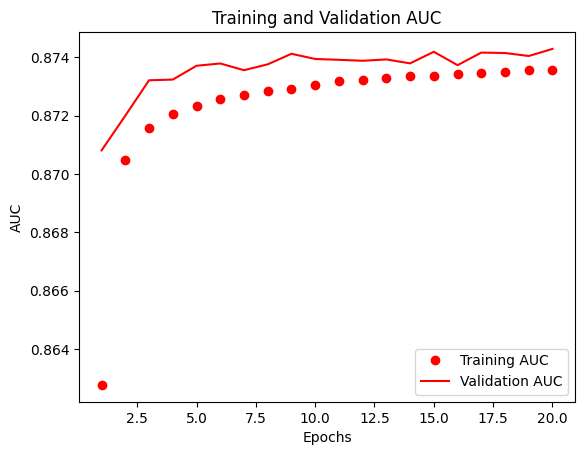

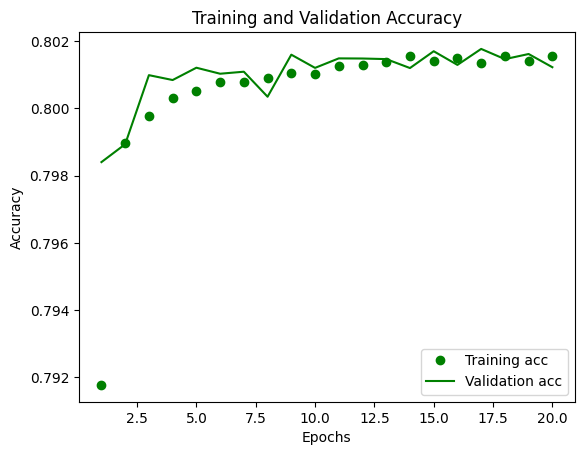

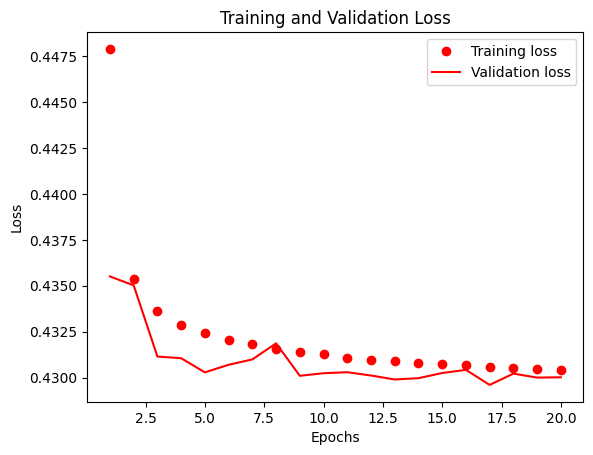

In [67]:
# Plot ACC / ACC / Loss in training and validation sets 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
auc = history_dict['auc_31'] 
val_auc = history_dict['val_auc_31']
epochs = range(1, len(loss_values) + 1)

plot_auc(auc,val_auc,epochs)
plot_acc(acc, val_acc,epochs)
plot_loss(loss_values, val_loss_values,epochs)

### 8.2 Results

After testing the model on the test dataset, we finally achieved an AUC of 87.46% and ACC of 80.16%. Although the AUC values is off by 0.0054, I believe I was able to successfully arrive at similar AUC value as the original paper. 